In [321]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau

Machine Amrta

In [322]:
filename = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Train_Foot.csv"
filename_test= 'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Test_Foot.csv'

Machine Dylane

In [323]:
filename = 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Train_Foot.csv'
filename_test= 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Test_Foot.csv'

In [324]:
# Chargement des données csv

data= pd.read_csv(filename,sep=";",index_col=0)

# y prend le score à prédire
y=data.score
data.head()


,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2409,6154
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4008,3054
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3029,4815
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2803,2045
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2156,1065


## Avec les win/lose cons

In [325]:
x=data[['puissance_HomeTeam','puissance_AwayTeam','win_cons_home','win_cons_away','lose_cons_home',
        'lose_cons_away','moy_goals_home','moy_goals_away','moy_goals_half_home','moy_goals_half_away',
       'moy_goals_conceded_home','moy_goals_conceded_away','moy_goals_conceded_half_home','moy_goals_conceded_half_away']]
x

,puissance_HomeTeam,puissance_AwayTeam,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away
0,2409,6154,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4008,3054,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3029,4815,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2803,2045,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2156,1065,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,6451,15239,1,1,0,0,1.370370,2.814815,0.613757,1.439153,0.984127,1.037037,0.396825,0.433862
376,4273,5802,0,2,1,0,1.306878,1.164021,0.587302,0.497354,1.164021,1.412698,0.544974,0.656085
377,13709,4725,1,2,0,0,1.724868,1.253968,0.693122,0.608466,0.640212,1.407407,0.232804,0.640212
378,14840,4571,0,1,1,0,2.920635,1.444444,1.105820,0.682540,0.809524,1.391534,0.349206,0.640212


In [326]:
data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','win_cons_home','win_cons_away',
                        'lose_cons_home','lose_cons_away','moy_goals_home','moy_goals_away',
                        'moy_goals_half_home','moy_goals_half_away','moy_goals_conceded_home',
                        'moy_goals_conceded_away','moy_goals_conceded_half_home',
                        'moy_goals_conceded_half_away']]
x_prediction

,date,status,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away
1082,2020-06-30,FINISHED,FC Barcelona,Club Atlético de Madrid,81,78,13105,9329,0,4,0,0,2.102564,1.325000,1.025641,0.475000,0.950000,0.750000,0.400000,0.375000
1980,2020-06-30,FINISHED,Vitória SC,Vitória FC,5543,5620,3593,3593,0,0,1,2,1.642857,0.785714,0.678571,0.285714,1.142857,1.250000,0.678571,0.535714
1982,2020-07-01,FINISHED,Os Belenenses Futebol,CD Tondela,5568,1049,1589,1729,0,0,2,2,0.857143,0.821429,0.571429,0.392857,1.571429,1.250000,0.678571,0.750000
1983,2020-07-01,FINISHED,Sporting Clube de Portugal,Gil Vicente FC,498,5533,5314,1346,3,1,0,0,1.607143,1.071429,0.892857,0.428571,1.035714,1.250000,0.428571,0.678571
1083,2020-07-01,FINISHED,Valencia CF,Athletic Club,95,77,9770,9286,0,1,2,0,1.350000,1.125000,0.475000,0.625000,1.906250,0.875000,0.937500,0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,1,0,0,0,2.000000,1.566667,0.694444,0.866667,1.166667,1.000000,0.433333,0.400000
2025,2020-07-26,SCHEDULED,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0,0,5,1,0.774194,0.833333,0.322581,0.566667,1.366667,1.666667,0.566667,0.700000
2026,2020-07-26,SCHEDULED,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0,2,2,0,0.966667,1.633333,0.400000,0.666667,1.200000,1.066667,0.500000,0.633333
2027,2020-07-26,SCHEDULED,Portimonense SC,CD Aves,5601,5544,1067,1159,0,1,1,0,0.800000,0.774194,0.400000,0.483871,1.290323,1.903226,0.580645,0.741935


## Sans les win/lose/cons et les moyennes half_time plus utiles pour les modèles de predic mi-temps

In [327]:
x=data[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction

,date,status,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1082,2020-06-30,FINISHED,FC Barcelona,Club Atlético de Madrid,81,78,13105,9329,2.102564,1.325000,0.950000,0.750000
1980,2020-06-30,FINISHED,Vitória SC,Vitória FC,5543,5620,3593,3593,1.642857,0.785714,1.142857,1.250000
1982,2020-07-01,FINISHED,Os Belenenses Futebol,CD Tondela,5568,1049,1589,1729,0.857143,0.821429,1.571429,1.250000
1983,2020-07-01,FINISHED,Sporting Clube de Portugal,Gil Vicente FC,498,5533,5314,1346,1.607143,1.071429,1.035714,1.250000
1083,2020-07-01,FINISHED,Valencia CF,Athletic Club,95,77,9770,9286,1.350000,1.125000,1.906250,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,2.000000,1.566667,1.166667,1.000000
2025,2020-07-26,SCHEDULED,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.966667,1.633333,1.200000,1.066667
2027,2020-07-26,SCHEDULED,Portimonense SC,CD Aves,5601,5544,1067,1159,0.800000,0.774194,1.290323,1.903226


In [328]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)


(9232, 6) (9232,)
3


In [329]:
x_train.shape[1]

6

In [330]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(5, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [331]:
model = create_model()
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 512)               3584      
_________________________________________________________________
dense_134 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_135 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_136 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_137 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_138 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_139 (Dense)            (None, 512)             

In [332]:
save = ModelCheckpoint('model_Foot_Win_All_Col.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [333]:
history = model.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=100,
                    callbacks = [save])

Train on 9232 samples, validate on 2308 samples
Epoch 1/100
8910/9232 [===========================>..] - ETA: 0s - loss: 14.8247 - accuracy: 0.4226
Epoch 00001: val_accuracy improved from -inf to 0.37565, saving model to model_Foot_Win_All_Col.h5
9232/9232 [==============================] - 2s 269us/sample - loss: 14.3530 - accuracy: 0.4241 - val_loss: 1.4217 - val_accuracy: 0.3756
Epoch 2/100
9090/9232 [============================>.] - ETA: 0s - loss: 1.1059 - accuracy: 0.4937
Epoch 00002: val_accuracy improved from 0.37565 to 0.50217, saving model to model_Foot_Win_All_Col.h5
9232/9232 [==============================] - 1s 122us/sample - loss: 1.1044 - accuracy: 0.4933 - val_loss: 1.0162 - val_accuracy: 0.5022
Epoch 3/100
9180/9232 [============================>.] - ETA: 0s - loss: 1.0683 - accuracy: 0.5038
Epoch 00003: val_accuracy improved from 0.50217 to 0.52340, saving model to model_Foot_Win_All_Col.h5
9232/9232 [==============================] - 1s 123us/sample - loss: 1.0685 

Epoch 28/100
8910/9232 [===========================>..] - ETA: 0s - loss: 0.9804 - accuracy: 0.5339
Epoch 00028: val_accuracy did not improve from 0.52816
9232/9232 [==============================] - 2s 171us/sample - loss: 0.9822 - accuracy: 0.5333 - val_loss: 0.9996 - val_accuracy: 0.5234
Epoch 29/100
9180/9232 [============================>.] - ETA: 0s - loss: 0.9814 - accuracy: 0.5336 ETA: 
Epoch 00029: val_accuracy did not improve from 0.52816
9232/9232 [==============================] - 2s 171us/sample - loss: 0.9807 - accuracy: 0.5346 - val_loss: 0.9994 - val_accuracy: 0.5238
Epoch 30/100
9000/9232 [============================>.] - ETA: 0s - loss: 0.9800 - accuracy: 0.5323
Epoch 00030: val_accuracy did not improve from 0.52816
9232/9232 [==============================] - 2s 171us/sample - loss: 0.9797 - accuracy: 0.5331 - val_loss: 1.0055 - val_accuracy: 0.5221
Epoch 31/100
9180/9232 [============================>.] - ETA: 0s - loss: 0.9795 - accuracy: 0.5357
Epoch 00031: val_a

Epoch 56/100
9000/9232 [============================>.] - ETA: 0s - loss: 0.9758 - accuracy: 0.5349
Epoch 00056: val_accuracy did not improve from 0.52816
9232/9232 [==============================] - 2s 170us/sample - loss: 0.9752 - accuracy: 0.5353 - val_loss: 0.9943 - val_accuracy: 0.5256
Epoch 57/100
9000/9232 [============================>.] - ETA: 0s - loss: 0.9773 - accuracy: 0.5338
Epoch 00057: val_accuracy did not improve from 0.52816
9232/9232 [==============================] - 2s 174us/sample - loss: 0.9773 - accuracy: 0.5323 - val_loss: 0.9840 - val_accuracy: 0.5221
Epoch 58/100
9090/9232 [============================>.] - ETA: 0s - loss: 0.9797 - accuracy: 0.5339
Epoch 00058: val_accuracy did not improve from 0.52816
9232/9232 [==============================] - 2s 180us/sample - loss: 0.9811 - accuracy: 0.5331 - val_loss: 0.9840 - val_accuracy: 0.5238
Epoch 59/100
8910/9232 [===========================>..] - ETA: 0s - loss: 0.9768 - accuracy: 0.5374
Epoch 00059: val_accurac

9090/9232 [============================>.] - ETA: 0s - loss: 0.9753 - accuracy: 0.5360
Epoch 00084: val_accuracy did not improve from 0.52816
9232/9232 [==============================] - 2s 173us/sample - loss: 0.9760 - accuracy: 0.5355 - val_loss: 0.9862 - val_accuracy: 0.5238
Epoch 85/100
9000/9232 [============================>.] - ETA: 0s - loss: 0.9767 - accuracy: 0.5339
Epoch 00085: val_accuracy did not improve from 0.52816
9232/9232 [==============================] - 2s 175us/sample - loss: 0.9772 - accuracy: 0.5336 - val_loss: 0.9855 - val_accuracy: 0.5234
Epoch 86/100
9000/9232 [============================>.] - ETA: 0s - loss: 0.9756 - accuracy: 0.5350
Epoch 00086: val_accuracy did not improve from 0.52816
9232/9232 [==============================] - 2s 175us/sample - loss: 0.9757 - accuracy: 0.5347 - val_loss: 0.9884 - val_accuracy: 0.5208
Epoch 87/100
9180/9232 [============================>.] - ETA: 0s - loss: 0.9778 - accuracy: 0.5341
Epoch 00087: val_accuracy did not imp

Text(0, 0.5, 'Accuracy')

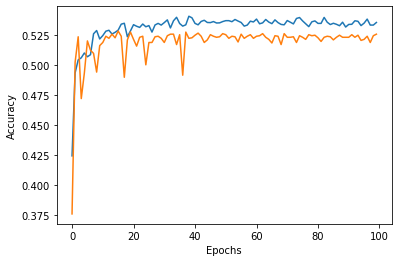

In [334]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prédiction 

In [335]:
unique = x_prediction.values
results = []
equal = []
victory = []
loss = []
i = 0
unique[1]

array(['2020-06-30', 'FINISHED', 'Vitória SC', 'Vitória FC', 5543, 5620,
       3593, 3593, 1.6428571428571428, 0.7857142857142857,
       1.1428571428571428, 1.25], dtype=object)

In [336]:
model.load_weights("model_Foot_Win.h5")

## Avec les 6 variables

In [337]:
for i in unique:
    predictions_final = model.predict(np.array([[i[4],i[5],i[6],i[7],i[8],i[9]]])) 
    egalite = predictions_final[0][0]*100
    victoire = predictions_final[0][1]*100
    perte = predictions_final[0][2]*100
    result = np.argmax(predictions_final)
    results.append(result)
    equal.append(egalite)
    victory.append(victoire)
    loss.append(perte)

## Avec toute les variables

In [339]:
for i in unique:
    predictions_final = model.predict(np.array([[i[6],i[7],i[8],i[9],i[10],i[11],i[12],i[13],i[14],i[15],i[16],i[17],i[18],i[19]]])) 
    egalite = predictions_final[0][0]*100
    victoire = predictions_final[0][1]*100
    perte = predictions_final[0][2]*100
    result = np.argmax(predictions_final)
    results.append(result)
    equal.append(egalite)
    victory.append(victoire)
    loss.append(perte)

IndexError: index 12 is out of bounds for axis 0 with size 12

In [ ]:
df = {'date':x_prediction.date,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'prediction_egalité':equal,
      'prediction_homeTeam_victory':victory,'prediction_awayTeam_victory':loss,'match_state':results}
df = pd.DataFrame(df)
df

In [ ]:
d

In [ ]:
d.to_csv('predictions_gain_perte.csv',index = False)
d.to_json (r'predictions_gain_perte.json')

In [ ]:
# 'date':test_csv.date,'id_HomeTeam':test_csv.idHomeTeam,'id_AwayTeam':test_csv.idAwayTeam,'homeTeam':test_csv.homeTeam,'AwayTeam':test_csv.awayTeam,'prediction_egalite':equal,'prediction_homeTeam_victory':victory,'prediction_awayTeam_victory':loss,'match_state':results

In [ ]:
np.asarray(equal)
np.asarray(victory)
np.asarray(loss)

In [ ]:
predictions1[0]

In [ ]:
print(len(equal))
print(len(victory))
test_csv.homeTeam.shape

In [ ]:
df = {'date':test_csv.date,'status':test_csv.status,'homeTeam':test_csv.homeTeam,'AwayTeam':test_csv.awayTeam,'prediction_egalite':np.around(equal,decimals=2),'prediction_homeTeam_victory':np.around(victory,decimals=2),'prediction_awayTeam_victory':np.around(loss,decimals=2),'match_state':results}

In [ ]:
finished = []
scheduled = []

In [ ]:
for i in d.values:
    if i[1] == 'FINISHED':
        finished.append(i)
    else:
        scheduled.append(i)

In [ ]:
column_names = ["date", "status", "homeTeam","AwayTeam","prediction_egalite","prediction_homeTeam_victory","prediction_awayTeam_victory","match_state"]
df_fini = pd.DataFrame(finished,columns = column_names)
df_programme = pd.DataFrame(scheduled,columns = column_names)

In [ ]:
df_fini

In [ ]:
df_programme

In [ ]:
df_fini.to_csv('predictions_gain_perte_finished.csv',index=False)
df_fini.to_json (r'predictions_gain_perte_finished.json')

In [ ]:
df_programme.to_csv('predictions_gain_perte_scheduled.csv',index=False)
df_programme.to_json (r'predictions_gain_perte_scheduled.json')